In [1]:
from google.colab import drive
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#estos son parametros para los gráficos, son modificables global y localmente
plt.rcParams.update({'legend.fontsize': 22})
plt.rcParams.update({'axes.titlesize': 22})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'ytick.labelsize': 24})
plt.rcParams.update({'xtick.labelsize': 24})
plt.rcParams.update({'legend.loc':"best"})
plt.rcParams.update({"figure.figsize": [9, 7]})
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
voltaje = []
tiempo = []

for i in range(1,6):

    path = f"/content/drive/MyDrive/2025/2C/L4/Módulo de Young/datos/datos 3-9/cobre/0.8/{i}.csv"
    df= pd.read_csv(path, header=None, skiprows= 1)
    t = df[0]
    v = df[2]

    inicio = []

    for n in range(len(v)-1):
        if v[n] >= 0.1:
            inicio.append(n)
            break

    tiempo.append(t[inicio[0]:]-t[inicio[0]])
    voltaje.append(v[inicio[0]:])
    print(inicio)



[3485]
[5855]
[3062]
[2569]
[2065]


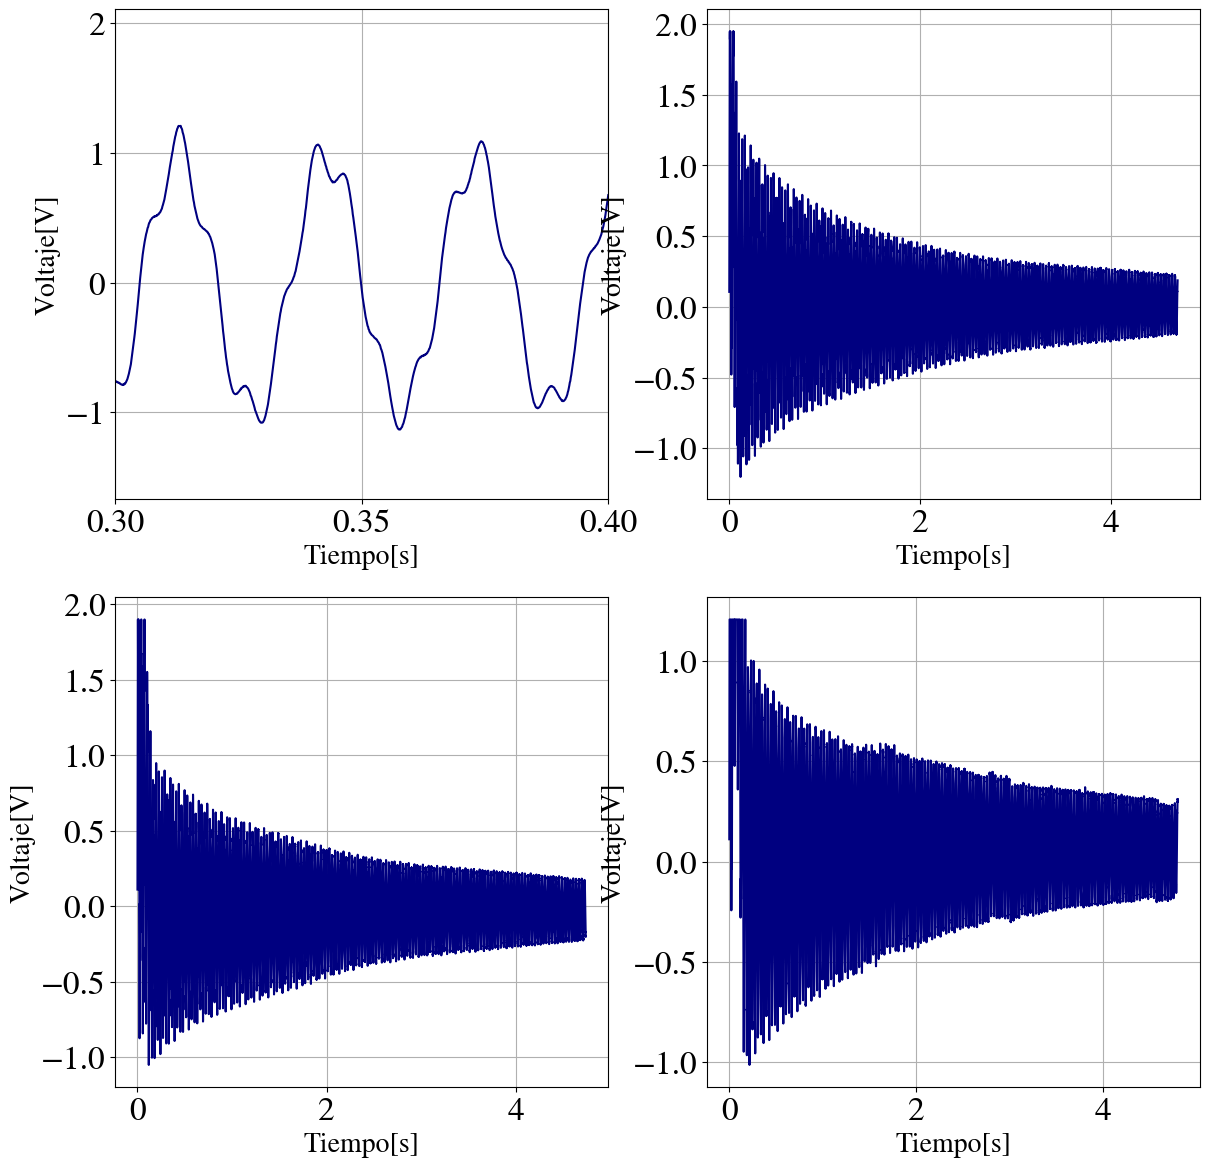

In [4]:
fig, axs = plt.subplots(2,2, figsize= (14,14))
axs[0,0].plot(tiempo[1], voltaje[1], color = 'navy', label = 'Señal')
axs[0,0].set_ylabel('Voltaje[V]')
axs[0,0].set_xlabel('Tiempo[s]')
axs[0,0].set_xlim(0.3,0.4)
#axs[0,0].legend()

axs[0,1].plot(tiempo[2], voltaje[2], color = 'navy', label = 'Señal')
axs[0,1].set_ylabel('Voltaje[V]')
axs[0,1].set_xlabel('Tiempo[s]')
#axs[0,1].legend()

axs[1,0].plot(tiempo[3], voltaje[3], color = 'navy', label = 'Señal')
axs[1,0].set_ylabel('Voltaje[V]')
axs[1,0].set_xlabel('Tiempo[s]')
#axs[1,0].legend()

axs[1,1].plot(tiempo[4], voltaje[4], color = 'navy', label = 'Señal')
axs[1,1].set_ylabel('Voltaje[V]')
axs[1,1].set_xlabel('Tiempo[s]')
#axs[1,1].legend()

plt.show()

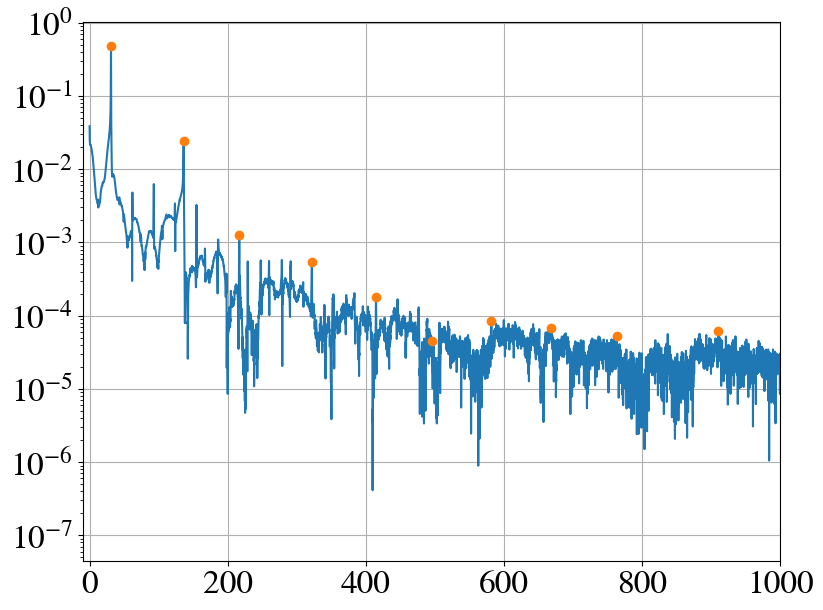

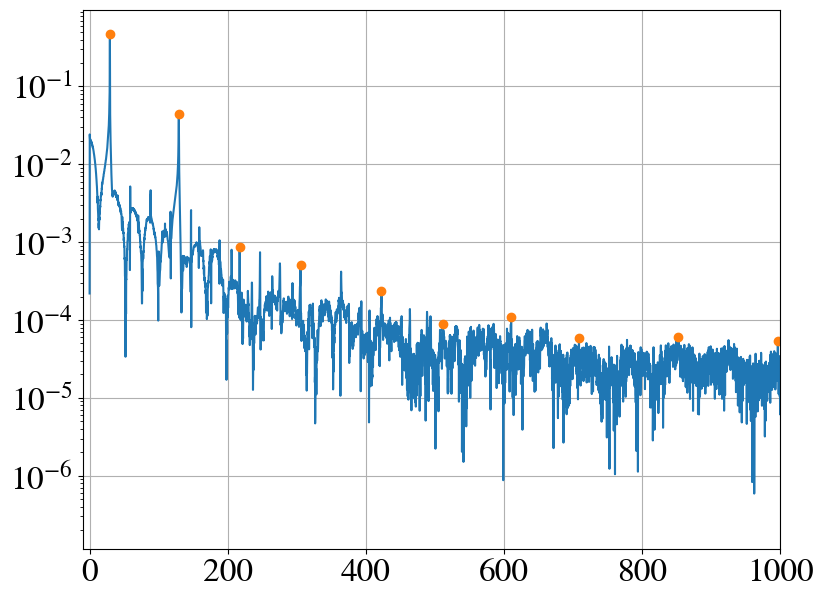

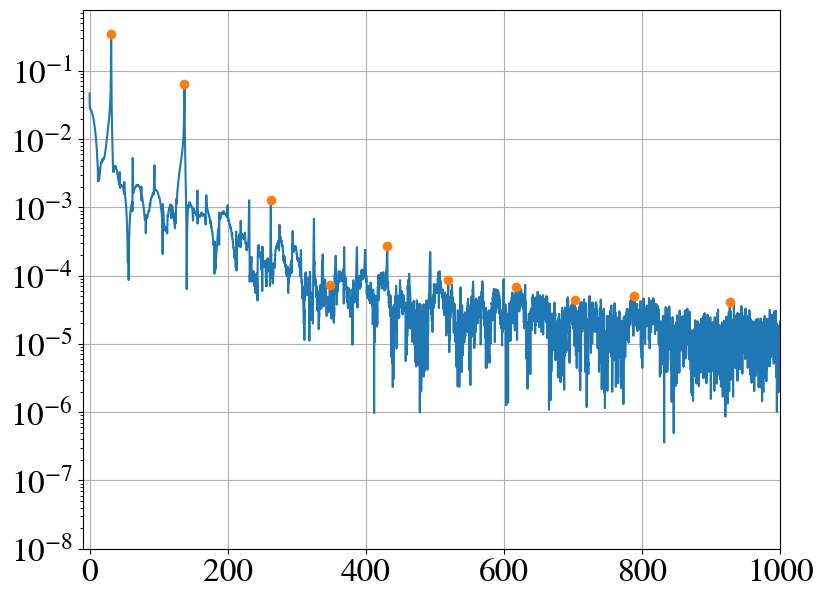

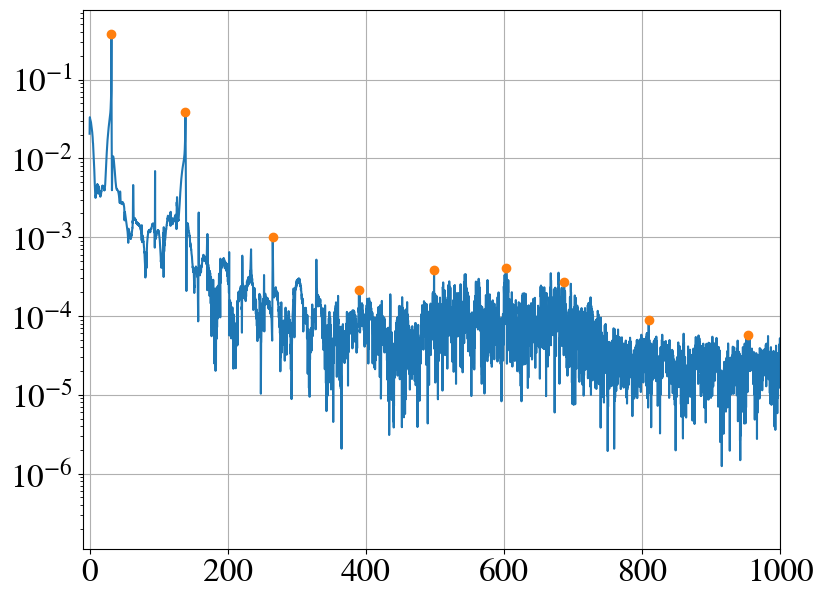

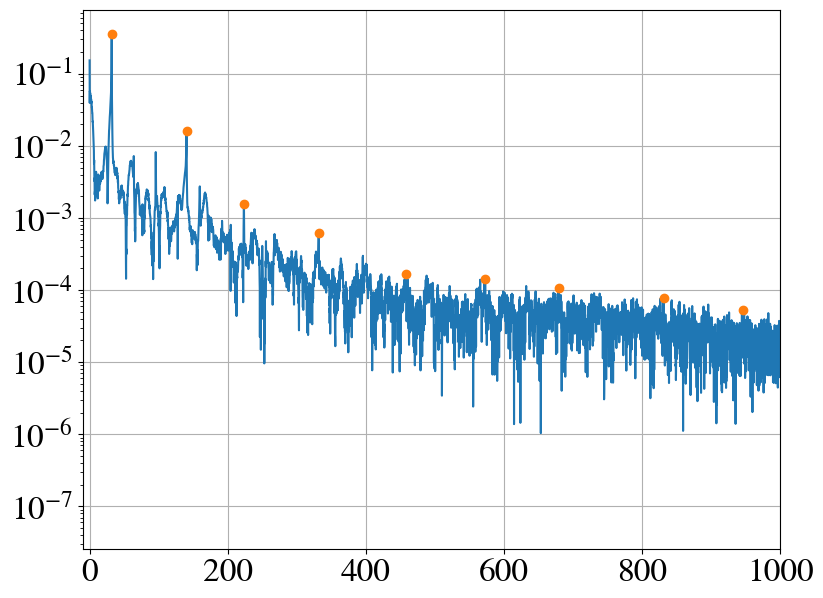

In [7]:
#calculo las tranformadas

N = 50000
frec_muestreo = 10000

# Calular el vector de frecuencias.
frec = np.arange(0,frec_muestreo,1/5)

fft = []
picos = []
frec_picos = []

for i in range(5):
    fft1 = np.fft.fft(voltaje[i])
    fft2 = 2.0/N * np.abs(fft1)
    picos1, diccionario = find_peaks(fft2, threshold = 0.000005, distance = 400)

    plt.plot(frec[:N//2], fft2[:N//2])
    plt.plot(frec[picos1], fft2[picos1], marker = 'o', linestyle = '')
    plt.yscale('log')
    plt.xlim(-10,1000)
    plt.show()

    fft.append(fft2)
    picos.append(picos1)
    frec_picos.append(frec[picos1][:3])


In [8]:
print(frec_picos)

[array([ 31. , 136.2, 216.6]), array([ 29.4, 129.2, 217.2]), array([ 31.2, 137.4, 262.4]), array([ 31.6, 138.8, 265.2]), array([ 32. , 140.4, 223.4])]
